In [90]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
feature_id = 2

In [91]:
BASE_NAME = "/home/ubuntu/HeLa_20KInt-rt-4340-4580"
CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(BASE_NAME)
SUMMED_REGIONS_DATABASE = '{}/HeLa_20KInt-features-{}-{}.sqlite'.format(BASE_NAME, feature_id, feature_id)

In [92]:
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
summed_ms1_region_df = pd.read_sql_query("select * from summed_ms1_regions where feature_id={} order by peak_id".format(feature_id), db_conn)
db_conn.close()

In [93]:
summed_ms1_region_df.head()

,feature_id,point_id,mz,retention_time_secs,scan,intensity,number_frames,peak_id,feature_point
0,2,2,878.405920,4461.544676,405,148134,4,1,2|2
1,2,5,878.406027,4461.605374,406,148373,4,1,2|5
2,2,10,878.405111,4460.272462,407,120046,3,1,2|10
3,2,14,878.406012,4459.032635,408,79212,2,1,2|14
4,2,17,878.405411,4459.040743,409,83918,2,1,2|17


In [94]:
summed_ms1_region_df.rename(columns={"peak_id":"feature_peak_id","point_id":"feature_point_id"}, inplace=True)

In [95]:
summed_ms1_region_df.drop(['mz', 'scan', 'intensity', 'number_frames'], axis=1, inplace=True)

In [96]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,retention_time_secs,feature_peak_id,feature_point
0,2,2,4461.544676,1,2|2
1,2,5,4461.605374,1,2|5
2,2,10,4460.272462,1,2|10
3,2,14,4459.032635,1,2|14
4,2,17,4459.040743,1,2|17


In [97]:
# add the summed_frame_point that contributed to each feature region point
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
ms1_feature_frame_join_df = pd.read_sql_query("select * from ms1_feature_frame_join where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [98]:
ms1_feature_frame_join_df.head()

,feature_id,feature_point_id,frame_id,frame_point_id,feature_point,summed_frame_point
0,2,1,50,44277,2|1,50|44277
1,2,1,54,48469,2|1,54|48469
2,2,2,50,44278,2|2,50|44278
3,2,2,51,42693,2|2,51|42693
4,2,2,52,43496,2|2,52|43496


In [99]:
ms1_feature_frame_join_df.rename(columns={"frame_id":"summed_frame_id"}, inplace=True)

In [100]:
ms1_feature_frame_join_df.drop(['feature_id', 'feature_point_id', 'frame_point_id'], axis=1, inplace=True)

In [101]:
ms1_feature_frame_join_df.head()

,summed_frame_id,feature_point,summed_frame_point
0,50,2|1,50|44277
1,54,2|1,54|48469
2,50,2|2,50|44278
3,51,2|2,51|42693
4,52,2|2,52|43496


In [102]:
summed_ms1_region_df = pd.merge(summed_ms1_region_df, ms1_feature_frame_join_df, how='left', left_on=['feature_point'], right_on=['feature_point'])

In [103]:
summed_ms1_region_df.drop(['feature_point'], axis=1, inplace=True)

In [104]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,retention_time_secs,feature_peak_id,summed_frame_id,summed_frame_point
0,2,2,4461.544676,1,50,50|44278
1,2,2,4461.544676,1,51,51|42693
2,2,2,4461.544676,1,52,52|43496
3,2,2,4461.544676,1,54,54|48470
4,2,5,4461.605374,1,50,50|44537


In [105]:
# add the raw_frame_point that contributed to each summed frame point
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_summed_join_df = pd.read_sql_query("select * from raw_summed_join where summed_frame_point in {}".format(tuple(summed_ms1_region_df.summed_frame_point.astype(str))), db_conn)
db_conn.close()

In [106]:
raw_summed_join_df.head()

,summed_frame_id,summed_point_id,raw_frame_id,raw_point_id,summed_frame_point,raw_frame_point
0,47,53690,41434,81714,47|53690,41434|81714
1,47,53690,41456,81563,47|53690,41456|81563
2,47,53981,41423,77420,47|53981,41423|77420
3,47,53981,41445,80648,47|53981,41445|80648
4,47,54262,41434,82550,47|54262,41434|82550


In [107]:
summed_ms1_region_df = pd.merge(summed_ms1_region_df, raw_summed_join_df, how='left', left_on=['summed_frame_point'], right_on=['summed_frame_point'])

In [108]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,retention_time_secs,feature_peak_id,summed_frame_id_x,summed_frame_point,summed_frame_id_y,summed_point_id,raw_frame_id,raw_point_id,raw_frame_point
0,2,2,4461.544676,1,50,50|44278,50,44278,41489,70288,41489|70288
1,2,2,4461.544676,1,50,50|44278,50,44278,41489,70289,41489|70289
2,2,2,4461.544676,1,50,50|44278,50,44278,41500,70297,41500|70297
3,2,2,4461.544676,1,50,50|44278,50,44278,41511,66641,41511|66641
4,2,2,4461.544676,1,50,50|44278,50,44278,41522,66252,41522|66252


In [109]:
summed_ms1_region_df.drop(['summed_frame_id_x','summed_frame_id_y','summed_frame_point','retention_time_secs'], axis=1, inplace=True)

In [110]:
# get the raw frame point's intensity
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_frames_df = pd.read_sql_query("select * from frames where raw_frame_point in {}".format(tuple(summed_ms1_region_df.raw_frame_point.astype(str))), db_conn)
db_conn.close()

In [111]:
summed_ms1_region_df = pd.merge(summed_ms1_region_df, raw_frames_df, how='left', left_on=['raw_frame_point'], right_on=['raw_frame_point'])

In [112]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,feature_peak_id,summed_point_id,raw_frame_id,raw_point_id,raw_frame_point,frame_id,point_id,mz,scan,intensity,peak_id,retention_time_secs
0,2,2,1,44278,41489,70288,41489|70288,41489,70288,878.404696,405,9168,0,4456.163586
1,2,2,1,44278,41489,70289,41489|70289,41489,70289,878.437409,405,1214,0,4456.163586
2,2,2,1,44278,41500,70297,41500|70297,41500,70297,878.404695,405,10521,0,4457.345016
3,2,2,1,44278,41511,66641,41511|66641,41511,66641,878.404696,405,10521,0,4458.525167
4,2,2,1,44278,41522,66252,41522|66252,41522,66252,878.400022,405,9168,0,4459.706028


In [113]:
summed_ms1_region_df.drop(['peak_id','raw_frame_point','point_id'], axis=1, inplace=True)

In [114]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,feature_peak_id,summed_point_id,raw_frame_id,raw_point_id,frame_id,mz,scan,intensity,retention_time_secs
0,2,2,1,44278,41489,70288,41489,878.404696,405,9168,4456.163586
1,2,2,1,44278,41489,70289,41489,878.437409,405,1214,4456.163586
2,2,2,1,44278,41500,70297,41500,878.404695,405,10521,4457.345016
3,2,2,1,44278,41511,66641,41511,878.404696,405,10521,4458.525167
4,2,2,1,44278,41522,66252,41522,878.400022,405,9168,4459.706028


In [115]:
# for each feature peak, use the raw points to find the RT and drift intensity-weighted centroids
peak_ids = summed_ms1_region_df.feature_peak_id.unique()

In [116]:
import peakutils
for peak_id in peak_ids:
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    centroid_scan = peakutils.centroid(peak_points_df.scan.astype(float), peak_points_df.intensity)
    centroid_rt = peakutils.centroid(peak_points_df.retention_time_secs.astype(float), peak_points_df.intensity)
    centroid_mz = peakutils.centroid(peak_points_df.mz.astype(float), peak_points_df.intensity)
    print("peak {}, scan {}, rt {}, mz {}".format(peak_id, centroid_scan, centroid_rt, centroid_mz))

peak 1, scan 414.222427662, rt 4459.75507079, mz 878.405911094
peak 2, scan 415.517356375, rt 4459.62648048, mz 877.904042457
peak 3, scan 411.562298076, rt 4458.2017908, mz 878.907869103
peak 4, scan 414.436519138, rt 4454.56622925, mz 879.40422017
peak 5, scan 421.377772053, rt 4450.9596694, mz 879.902808807
peak 6, scan 420.812709214, rt 4450.99757583, mz 880.403773241


In [117]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

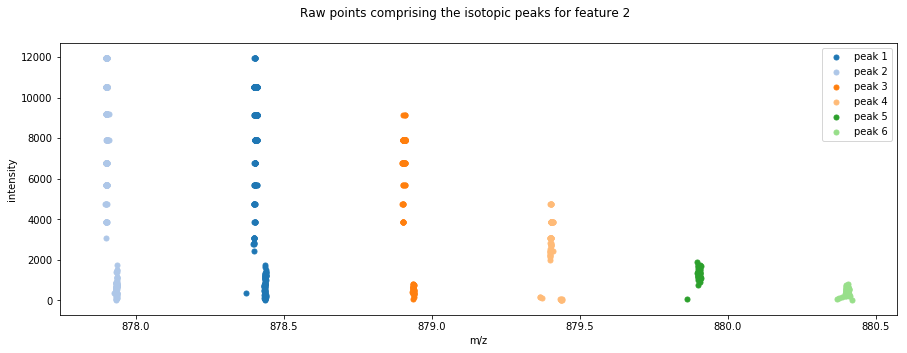

In [118]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

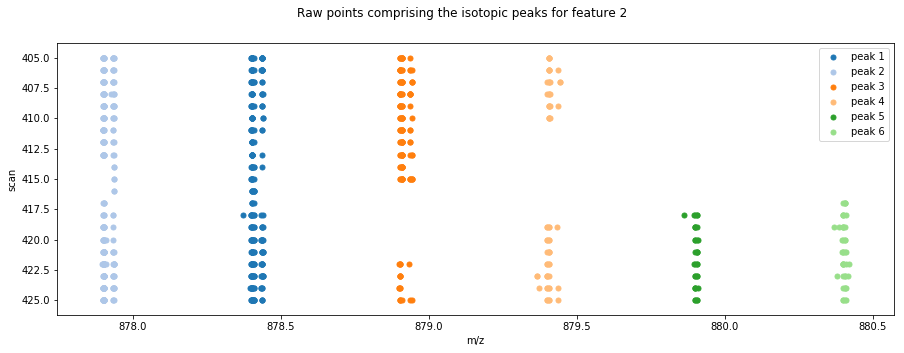

In [119]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.scan, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

In [120]:
# find the feature's apex frame
apex_frame_id = summed_ms1_region_df.iloc[summed_ms1_region_df.intensity.idxmax()].frame_id
print("apex frame of feature {}: {}".format(feature_id,int(apex_frame_id)))

apex frame of feature 2: 41500


In [121]:
apex_frame_summed_ms1_region_df = summed_ms1_region_df[(summed_ms1_region_df.frame_id == apex_frame_id)]

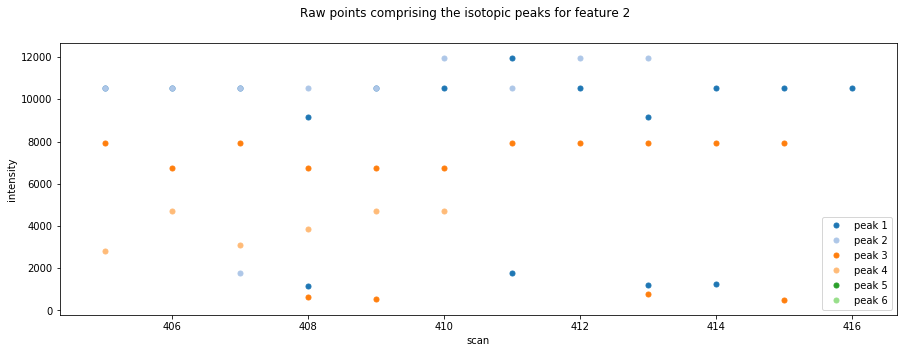

In [122]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = apex_frame_summed_ms1_region_df.loc[apex_frame_summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.scan, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('scan')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

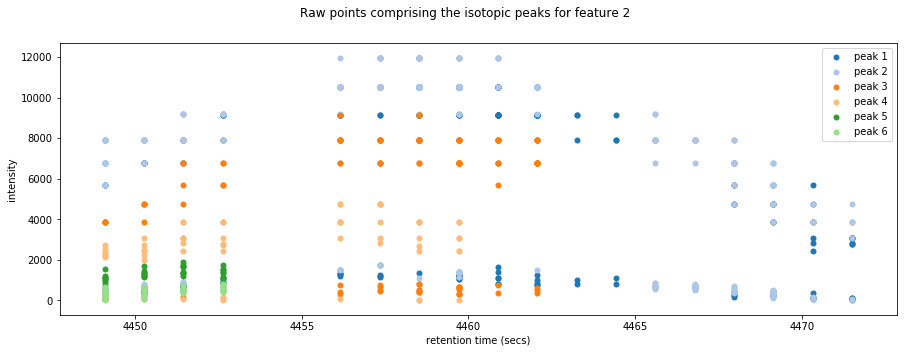

In [123]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id].copy()
    peak_points_df.sort_values(by=['raw_frame_id'], inplace=True)
    ax.plot(peak_points_df.retention_time_secs, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

In [124]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,feature_peak_id,summed_point_id,raw_frame_id,raw_point_id,frame_id,mz,scan,intensity,retention_time_secs
0,2,2,1,44278,41489,70288,41489,878.404696,405,9168,4456.163586
1,2,2,1,44278,41489,70289,41489,878.437409,405,1214,4456.163586
2,2,2,1,44278,41500,70297,41500,878.404695,405,10521,4457.345016
3,2,2,1,44278,41511,66641,41511,878.404696,405,10521,4458.525167
4,2,2,1,44278,41522,66252,41522,878.400022,405,9168,4459.706028


In [125]:
summed_ms1_region_df.rename(columns={"retention_time_secs":"rt"}, inplace=True)

In [126]:
# get the raw frame point's intensity
min_mz = summed_ms1_region_df.mz.min()
max_mz = summed_ms1_region_df.mz.max()
min_scan = summed_ms1_region_df.scan.min()
max_scan = summed_ms1_region_df.scan.max()
min_rt = summed_ms1_region_df.rt.min()
max_rt = summed_ms1_region_df.rt.max()

db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_points_in_region_df = pd.read_sql_query("select * from frames where retention_time_secs >= {} and retention_time_secs <= {} and scan >= {} and scan <= {} and mz >= {} and mz <= {}".format(min_rt, max_rt, min_scan, max_scan, min_mz, max_mz), db_conn)
db_conn.close()

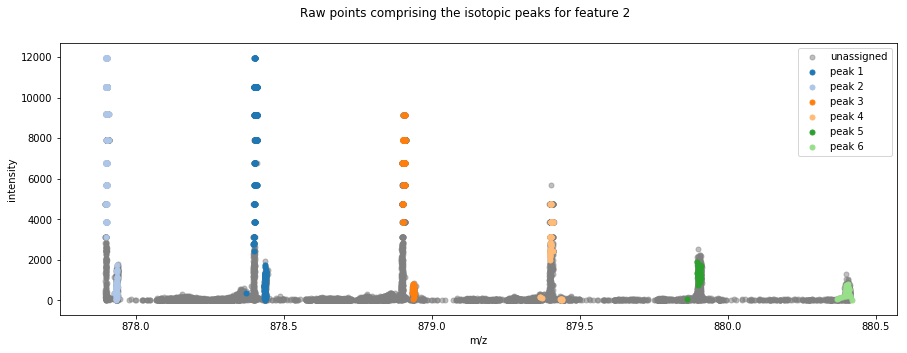

In [127]:
f, ax = plt.subplots()
ax.plot(raw_points_in_region_df.mz, raw_points_in_region_df.intensity, marker='o', alpha=.5, color='grey', linestyle='', ms=5, label="unassigned")
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

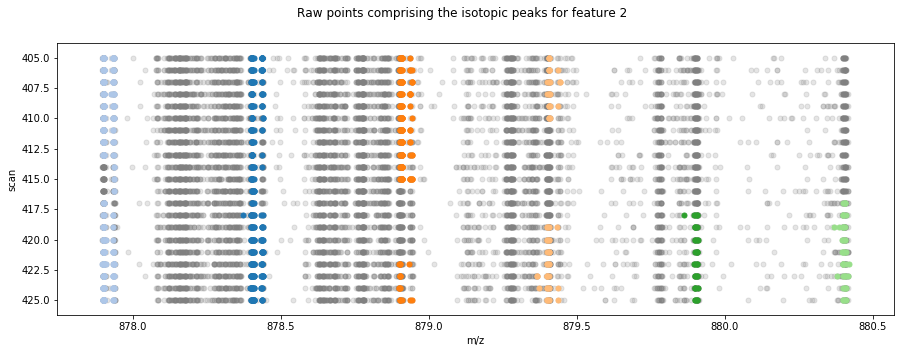

In [128]:
f, ax = plt.subplots()
ax.plot(raw_points_in_region_df.mz, raw_points_in_region_df.scan, marker='o', color='grey', alpha=0.2, linestyle='', ms=5, label="unassigned")
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.scan, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
# plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()